Problem 1 and 2: 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv('data_challenge_stock_prices.csv')
ROW = len(df.index) # 2,00,000
COL = len(df.columns) # 100


# CALCULATING RETURNS FOR EACH STOCK, STORING IT IN "ret_df"
ret_df = df.pct_change().dropna()*100
ret_dftrans = ret_df.transpose()
ret_dftrans.columns = ret_dftrans.columns.astype(str)


# REDUCING DIMENSIONS FROM 2,00,000 to 3 USING PCA
pca = PCA(n_components=3)
data2 = pca.fit_transform(ret_dftrans)
data2 = pd.DataFrame(data2)


# CLUSTERING STOCKS USING KMEANS ALGORITHM
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 42, n_init=20)
kmeans.fit(ret_dftrans)
data2['sector'] = kmeans.labels_


# MAKING A LIST OF SECTORS TO SEPARATE EACH CLUSTER
sectors = []
for i in range(n_clusters):
    sector = data2[data2['sector']==i].drop('sector', axis=1).transpose()
    sectors.append(sector)


# PLOTTING ALL CLUSTERS IN A 3D PLOT
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'yellow', 'cyan']
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(n_clusters):
    ax.scatter(sectors[i].loc[0], sectors[i].loc[1], sectors[i].loc[2], color=colors[i], alpha=0.75)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')
plt.show()


In this code, we used KMeans algorithm to cluster the dataset. 

First we randomly chose the number of clusters. To visually inspect the data, we reduced the dimension of the column vectors in stock returns matrix from 2,00,000 to 3. The 3D plot made it clear that there are 4 clusters. 

M = 4

Partition of stocks into sectors is stored in "sectors" list in the above code 
(It is not printed as it would be very long).



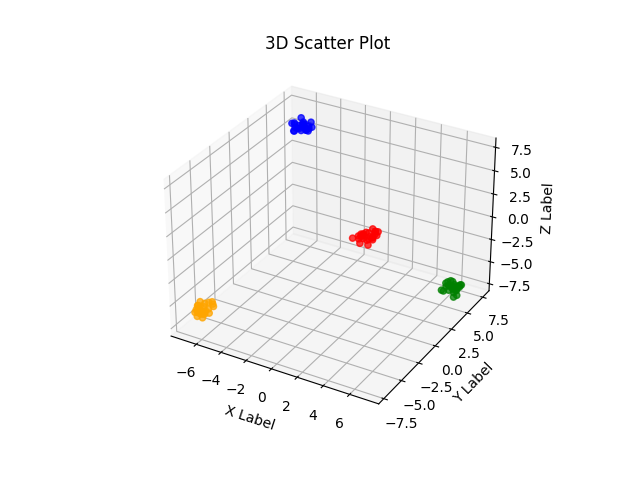


Problem 3: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import cvxpy as cp
from time import time


dfi = pd.read_csv('data_challenge_index_prices.csv')
dfs = pd.read_csv('data_challenge_stock_prices.csv')


ri = dfs.pct_change().dropna()*10000
Ri = dfi.pct_change().dropna()*10000



# CALCULATING RETURNS FOR EACH STOCK, STORING IT IN "ret_df"
ri_trans = ri.transpose()
x = ri_trans

# CLUSTERING STOCKS USING KMEANS ALGORITHM
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state = 42)
kmeans.fit(ri_trans)
x['sector'] = kmeans.labels_

# MAKING A LIST OF SECTORS TO SEPARATE EACH CLUSTER
sectors = []
for i in range(n_clusters):
    sector = x[x['sector']==i].drop('sector', axis=1).transpose()
    sectors.append(sector)

#list_of_sector_numbers = [1l, 0, 1r, 2, 3l, 0r, 2l, 1, 2, 3, 0, 1, 3, 2, 3r]
list_of_sector_numbers = [1, 0, 1, 2, 3, 0, 2, 1, 2, 3, 0, 1, 3, 2, 3]

predictors = [None]*15



def cosaa(lr, X, y):
    y_pred = lr.predict(X)
    y_test_np = y.values

    dot_product = np.dot(y_pred, y_test_np)

    # calculate the magnitudes of the two vectors
    magnitude1 = np.linalg.norm(y_pred)
    magnitude2 = np.linalg.norm(y_test_np)

    # calculate the cosine of the angle between the two vectors
    cosine_similarity = dot_product / (magnitude1 * magnitude2)
    print(cosine_similarity)

print(sectors[1])

X_train, X_test, y_train, y_test = train_test_split(sectors[1], Ri['0'], test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictors[0] = lr
cosaa(lr, X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(sectors[3], Ri['4'], test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictors[4] = lr
cosaa(lr, X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(sectors[2], Ri['6'], test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictors[6] = lr
cosaa(lr, X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(sectors[1], Ri['2'], test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)
predictors[2] = rf
cosaa(rf, X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(sectors[0], Ri['5'], test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=5, random_state=0)
rf.fit(X_train, y_train)
predictors[5] = rf
cosaa(rf, X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(sectors[3], Ri['14'], test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=5, random_state=0)
rf.fit(X_train, y_train)
predictors[14] = rf
cosaa(rf, X_test, y_test)




In this, we have used two regression techniques to fit the data. One is Linear Regression and the other is Random Forest Regression. Our approach to the problem is following: \\

We first used Linear Regression over the whole data. That means we performed \\

15 indices * 4 sectors = 60 regression analyses

Now to measure how well a sector fits with the index, we used the cosine between y_test and y_predicted to find the predictive correlation. This is a measure of how well the data fits. As the problem required a predictive correlation of 40 percent, we chose only those indices in which the maximum predictive correlation among all 4 sectors is > 0.40 (cosine value). \\

This results in three indices, namely 0, 4 and 6th index. 

We applied same procedure with Random Forest regression and got 3 more indices that give the desired predictive correlation, namely 2, 5 and 14th index. 

Therefore our k = 6. 

| Index | Best fit sector |
| --- | --- |
| 0 | 1 | 
| 2 | 1 | 
| 4 | 3 | 
| 5 | 0 | 
| 6 | 2 | 
| 14 | 3 | 

Only the indices that fit well have been reported in the table.


Problem 4: 

In [ ]:
# tuple (Index, its Sector Number). 
list_sector_k = [(0, 1), (2, 1), (4, 3), (5, 0), (6, 2), (14, 3)]
mu = predictors[0].predict(sectors[1])
mu = np.column_stack((mu, predictors[2].predict(sectors[1])))
mu = np.column_stack((mu, predictors[4].predict(sectors[3])))
mu = np.column_stack((mu, predictors[5].predict(sectors[0])))
mu = np.column_stack((mu, predictors[6].predict(sectors[2])))
mu = np.column_stack((mu, predictors[14].predict(sectors[3])))

# mu_data is k X N whereas mu is N X k.
mu_data = mu.transpose()  
covariance_matrix = np.cov(mu.transpose())
c = covariance_matrix


To calculate the prediction matrix mu and the covariance matrix c, we first made a list of regression objects called predictors. Then we stack the predicted vectors to get the desired prediction matrix. \\ 

For covariance matrix, we used the numpy.cov() function. 



Problem 5: Trading Strategy

In [ ]:


def alloc(i):
    weights = cp.Variable(6)
    objective = cp.Maximize(weights.T @ mu[i] - cp.quad_form(weights, c))
    constraints = [
        cp.sum(weights) == 0,
        weights >= -1,
        weights <= 1
    ]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    optimal_weights = np.array(weights.value).flatten()
    return optimal_weights
    #print("Optimal weights: ", optimal_weights)



allocation_matrix = np.array([[0.0]*6]*200000)
allocation_matrix[0] = [0, 2, 4, 5, 6, 14]

for i in range(199999):
    garb = alloc(i)
    allocation_matrix[i+1] = garb

allocation_matrix = pd.DataFrame(allocation_matrix)
allocation_matrix.to_csv('allocation_matrix.csv')


In this we have computed the optimal portfolio weights at each time t by maximising 
  $ w^T \mu - \lambda/2 * w^T \Sigma w$
  
Here $w$ is the allocation vector for the k=6 indices at time t, i.e, is a vector of length 6 and $\lambda$ is the risk aversion factor. It has been assumed to be 2 in this problem by us. We have used python cvxpy library to find optimization values of the allocation $A^t$. Constraints are as set in the problem statement.
A loop is run for all the 199999 time points from time = 1 unit to time = 199999 units. allocation_matrix is the numpy matrix of size 200000*6 where first row represents the index od indices for which it is possible to find predictive corelation >= 40% in problem 3.

Problem 6: Calculating mean, stddev and sharpe for our allocation strategy: 


In [ ]:
import pandas as pd 
import numpy as np



dfi = pd.read_csv('./data_challenge_index_prices.csv')
dfs = pd.read_csv('data_challenge_stock_prices.csv')


rs = dfs.pct_change().dropna()*10000
ri = dfi.pct_change().dropna()*10000


indexList = [0,2,4,5,6,14]
al = pd.read_csv('allocation_matrix.csv')
al = al.drop(0)
al = al.drop(columns=['Unnamed: 0'])
al = al.rename(columns={'0':'0', '1':'2', '2':'4', '3':'5', '4':'6' , '5':'14'})



ri2 = ri.drop(columns=['1', '3', '7','8', '9', '10', '11', '12', '13'])


# FINDING MEAN
c = al*ri2 
c = c.sum(axis='columns')
c_mean = c.mean(axis='index')
print("mean: ", c_mean)

# FINDING STANDARD DEVIATION
c_std = c.std(axis='index') 
print("std deviation: ", c_std)

# FINDING SHARPE RATION
c_sharpe = c_mean/c_std
print("sharpe ratio: ", c_sharpe)


In this, we have taken the dot product of return rates of indices with the allocated vectors. Then we took the mean across all times. Please note that while calculating mean, we are using bps values for return rates. Therefore actual mean in dollars is 10,000 times less. Same goes for standard deviation. 

Mean = 2.482 \\
Standard Deviation = 2.298 \\
Sharpe ratio = 1.080 \\


Some assumptions: 
1. To run the code, there should be data_challenge_stock_prices.csv and data_challenge_index_prices.csv in the same directory. 

2. All the required libraries should be pre-installed in the machine to run the code. 

3. In the Problem 3, we have printed the analysis only for those indices which give high correlation. We haven't printed them for all indices as it would take a lot of time (Random Forest regression takes around 15 minutes to print 60 values = 4 sectors for 15 indices each). 

4. We have stored the allocation_matrix obtained from problem 5 in a file "allocation_matrix.csv". This file is required for the code in problem 6. 